# importing libraries


In [44]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# to apply machine learning algorithm to learn from training  data 
#      1. support vector classification 
from sklearn.svm import SVC
#      2. Decision tree classification 
from sklearn.tree import DecisionTreeClassifier
#      3. random forest classifier
from sklearn.ensemble import RandomForestClassifier
#      4. logistic regression
from sklearn.linear_model import LogisticRegression
#      5. knn classification
from sklearn.neighbors import KNeighborsClassifier


# for to check the score of the model as to how efficiently it is working
from sklearn import metrics


# importing the dataframe


In [2]:
df = pd.read_csv('kepler_data.csv')

In [3]:
df

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [5]:
df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

# eleminating unused columns and null rows 

In [6]:
df = df.drop(['kepid', 'kepoi_name', 'kepler_name','koi_teq_err1', 'koi_teq_err2'], axis=1)

In [7]:
df

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,CANDIDATE,CANDIDATE,0.092,0,0,0,0,333.486169,4.240000e-03,-4.240000e-03,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [8]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Fill NaN values in numerical columns with the mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill NaN values in categorical columns with the mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,CANDIDATE,CANDIDATE,0.092,0,0,0,0,333.486169,4.240000e-03,-4.240000e-03,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


In [10]:
df.dropna()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,CANDIDATE,CANDIDATE,0.092,0,0,0,0,333.486169,4.240000e-03,-4.240000e-03,...,-128.0,2.992,0.030,-0.027,7.824,0.223,-1.896,296.76288,47.145142,10.998


# seperating the input variables and the target variables


In [12]:
y=df['koi_disposition'] ## target variable ##

In [13]:
## input variable ##
x=df[[
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']]  

In [14]:
cat_x= x.select_dtypes(include=['object'])
num_x= x.select_dtypes(include=['int64','float64'])

In [15]:
print(cat_x.dtypes)
print("===================================")
print(num_x.dtypes)
print("===================================")

koi_pdisposition     object
koi_tce_delivname    object
dtype: object
koi_score            float64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num     float64
koi_steff            float64
koi_steff_err1       float64
koi_steff_err2       float64
ko

In [16]:
num_x.isnull()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9561,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9562,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
scaler = StandardScaler()
num_x_rescaled = pd.DataFrame(scaler.fit_transform(num_x), columns = num_x.columns, index = num_x.index)

In [18]:
for col in cat_x:
    print(col , cat_x[col].unique())

koi_pdisposition ['CANDIDATE' 'FALSE POSITIVE']
koi_tce_delivname ['q1_q17_dr25_tce' 'q1_q16_tce' 'q1_q17_dr24_tce']


In [21]:
cat_x_rescaled=pd.DataFrame(index=cat_x.index)

kpd={'CANDIDATE':0,'FALSE POSITIVE':1}
ktcedn={'q1_q17_dr25_tce':0, 'q1_q16_tce':1, 'q1_q17_dr24_tce':2}

cat_x_rescaled['koi_pdisposition']=cat_x['koi_pdisposition'].apply(lambda x:kpd[x])
cat_x_rescaled['koi_tce_delivname']=cat_x['koi_tce_delivname'].apply(lambda x:ktcedn[x])

In [22]:
cat_x_rescaled

,koi_pdisposition,koi_tce_delivname
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
9559,1,0
9560,0,0
9561,1,0
9562,0,0


In [23]:
X=pd.concat([cat_x_rescaled,num_x_rescaled],axis=1)
X

,koi_pdisposition,koi_tce_delivname,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,1.186309,-0.043758,-0.550774,-0.496109,-0.369333,-0.049588,-0.263629,0.263629,...,1.146488,0.369657,-0.438000,0.565783,-0.133408,-0.283437,0.157874,-0.026421,1.202764,0.781341
1,0,0,1.115474,-0.043758,-0.550774,-0.496109,-0.369333,-0.015924,-0.236255,0.236255,...,1.146488,0.369657,-0.438000,0.565783,-0.133408,-0.283437,0.157874,-0.026421,1.202764,0.781341
2,0,0,-1.098699,-0.043758,-0.550774,-0.496109,-0.369333,-0.041787,-0.265233,0.265233,...,-0.193773,0.551135,-0.592394,-0.393974,-0.143226,-0.142430,0.149834,1.037397,1.200675,0.845587
3,1,0,-1.098699,-0.043758,1.815626,-0.496109,-0.369333,-0.055395,-0.267052,0.267052,...,-0.165557,0.598272,-0.522916,-0.297999,-0.156039,-0.177682,0.155036,-1.369071,1.242630,0.961807
4,0,0,1.186309,-0.043758,-0.550774,-0.496109,-0.369333,-0.054804,-0.266618,0.266618,...,-0.687553,0.301308,-0.391682,-0.801871,-0.113606,-0.031167,0.123821,-0.693454,1.226243,0.898283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,1,0,-1.098699,-0.043758,1.815626,2.015688,-0.369333,-0.056301,-0.267071,0.267071,...,-0.052693,0.515782,-0.661871,-0.633914,-0.137402,-0.138024,0.149361,1.075986,0.911785,-0.131817
9560,0,0,0.036950,-0.043758,-0.550774,-0.496109,-0.369333,-0.055393,-0.264872,0.264872,...,-0.814525,0.315449,-0.499757,-0.969829,-0.116102,-0.023456,0.132808,-1.164565,0.931057,0.355441
9561,1,0,-1.050714,-0.043758,-0.550774,2.015688,-0.369333,-0.056186,-0.266783,0.266783,...,-1.040253,0.322520,-0.499757,-0.969829,-0.114438,-0.023456,0.132808,0.441575,0.934684,0.808772
9562,0,0,-0.888478,-0.043758,-0.550774,-0.496109,-0.369333,0.193167,0.260006,-0.260006,...,0.483412,-3.106704,-0.700470,1.393574,1.014283,-0.153446,-0.709992,0.986638,0.926037,-2.358044


In [27]:
y.unique()

array(['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [28]:
kpisdis={'CONFIRMED':0, 'CANDIDATE':1, 'FALSE POSITIVE':2}

Y=pd.DataFrame(index=y.index)
Y=y.apply(lambda x:kpisdis[x])


In [29]:
Y

0       0
1       0
2       1
3       2
4       0
       ..
9559    2
9560    1
9561    2
9562    1
9563    2
Name: koi_disposition, Length: 9564, dtype: int64

In [35]:
###performing train test split###

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [36]:
X_train

,koi_pdisposition,koi_tce_delivname,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6201,1,0,-1.098699e+00,-0.043758,1.815626,-0.496109,-0.369333,-0.055412,-0.267080,0.267080,...,-0.645229,-0.434030,0.804872,-0.489950,-0.019255,0.123059,-0.037455,-0.077461,-1.217696,-0.689817
2167,0,0,1.174884e+00,-0.043758,-0.550774,-0.496109,-0.369333,-0.042796,-0.250054,0.250054,...,-0.278421,0.602986,-0.685030,-0.429965,-0.149716,-0.164462,0.153144,0.527875,-1.486638,1.046265
336,0,0,1.186309e+00,-0.043758,-0.550774,-0.496109,-0.369333,-0.051133,-0.264748,0.264748,...,1.005408,0.100976,-0.345363,0.349838,-0.091974,-0.196409,0.136118,0.136987,-1.514062,0.399475
8653,0,2,2.410025e-15,-0.043758,-0.550774,-0.496109,-0.369333,-0.039624,-0.216489,0.216489,...,-0.433609,0.440363,-0.584674,1.177628,-0.130746,-0.079638,0.144631,0.408632,0.394955,0.806606
710,0,0,1.186309e+00,-0.043758,-0.550774,-0.496109,-0.369333,-0.042270,-0.260708,0.260708,...,-0.405393,0.463931,-0.561515,-0.729889,-0.131079,-0.098366,0.143685,-1.196310,-0.389865,0.796500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,1.186309e+00,-0.043758,-0.550774,-0.496109,-0.369333,-0.054609,-0.266431,0.266431,...,1.118272,-0.669716,-0.677311,1.393574,0.000714,-0.269116,0.141794,-0.985720,-1.415257,-4.360494
79,1,0,-1.098699e+00,-0.043758,1.815626,-0.496109,-0.369333,-0.055622,-0.266993,0.266993,...,1.019516,-0.212486,0.272213,0.313847,-0.064850,-0.145735,0.077945,-0.255218,-1.688840,0.618922
8039,0,2,2.410025e-15,-0.043758,-0.550774,-0.496109,-0.369333,-0.046995,-0.244087,0.244087,...,0.384656,0.998937,-0.391682,0.877704,-0.200303,-0.344025,0.153617,-2.245587,-0.042232,1.009450
6936,0,1,2.410025e-15,-0.043758,-0.550774,-0.496109,-0.369333,0.013253,-0.043320,0.043320,...,-0.617013,-0.547159,0.727675,-1.353732,-0.009271,0.460152,-0.027523,-2.058962,0.131030,-2.410018


In [37]:
 X_test

,koi_pdisposition,koi_tce_delivname,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5771,1,2,2.410025e-15,-0.043758,-0.550774,2.015688,-0.369333,-0.052073,-0.262274,0.262274,...,-0.913281,0.416794,-0.569235,-1.449707,-0.127418,-0.023456,0.142740,1.175297,1.195612,0.823931
6261,1,1,2.410025e-15,0.166016,-0.550774,-0.496109,-0.369333,0.208063,1.746802,-1.746802,...,-3.325750,-1.692591,1.746676,0.673756,0.436194,0.377531,-0.732693,0.178708,-1.154963,-3.276976
6891,1,0,-1.098699e+00,-0.043758,1.815626,-0.496109,-0.369333,-0.035973,-0.267012,0.267012,...,0.271792,0.666621,-0.661871,0.457810,-0.159867,-0.253693,0.155509,-1.100141,0.853621,0.318626
4911,1,0,-1.098699e+00,-0.043758,1.815626,-0.496109,-0.369333,-0.037690,-0.266833,0.266833,...,-0.842741,0.339018,-0.484318,-1.065805,-0.117267,-0.014643,0.131862,-1.389330,1.136616,0.919217
7691,1,0,-1.098699e+00,-0.043758,1.815626,-0.496109,-0.369333,-0.053243,-0.267035,0.267035,...,0.017847,0.694903,-0.654151,-0.118044,-0.162030,-0.225051,0.161658,-0.773340,-0.143323,0.763294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,0,0,1.184024e+00,-0.043758,-0.550774,-0.496109,-0.369333,-0.048002,-0.253037,0.253037,...,1.245244,-0.082859,0.364849,0.373832,-0.093638,-0.207425,0.086458,-0.502532,1.724385,0.714208
4694,0,0,5.830668e-01,-0.043758,-0.550774,-0.496109,-0.369333,-0.026464,-0.217111,0.217111,...,-0.095017,0.607699,-0.654151,0.097901,-0.151214,-0.216238,0.153144,-0.025722,-1.219224,1.018834
9138,1,0,-1.098699e+00,0.166016,-0.550774,2.015688,-0.369333,-0.056264,-0.266728,0.266728,...,-0.391285,0.454504,-0.546076,-0.681902,-0.136570,-0.098366,0.143685,0.762557,-0.292545,1.059980
4598,0,0,1.186309e+00,-0.043758,-0.550774,-0.496109,-0.369333,-0.051750,-0.255934,0.255934,...,-0.052693,0.586488,-0.685030,-0.429965,-0.144557,-0.171072,0.154090,-0.193945,-1.362102,0.829706


In [38]:
y_train

6201    FALSE POSITIVE
2167         CONFIRMED
336          CONFIRMED
8653         CANDIDATE
710          CONFIRMED
             ...      
350          CONFIRMED
79      FALSE POSITIVE
8039         CANDIDATE
6936         CANDIDATE
5640    FALSE POSITIVE
Name: koi_disposition, Length: 6694, dtype: object

In [39]:
 y_test

5771    FALSE POSITIVE
6261    FALSE POSITIVE
6891    FALSE POSITIVE
4911    FALSE POSITIVE
7691    FALSE POSITIVE
             ...      
5148         CANDIDATE
4694         CANDIDATE
9138    FALSE POSITIVE
4598         CANDIDATE
8608    FALSE POSITIVE
Name: koi_disposition, Length: 2870, dtype: object

# apply different algorithms

## decision tree classification


In [41]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
y_test_pred = classifier.predict(X_test)

In [43]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
5771,FALSE POSITIVE,FALSE POSITIVE
6261,FALSE POSITIVE,CONFIRMED
6891,FALSE POSITIVE,FALSE POSITIVE
4911,FALSE POSITIVE,FALSE POSITIVE
7691,FALSE POSITIVE,FALSE POSITIVE


<AxesSubplot:xlabel='koi_disposition', ylabel='Count'>

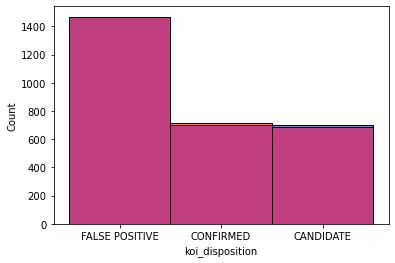

In [45]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [46]:
print('accuracy: ',sklearn.metrics.accuracy_score(y_test,y_test_pred))

accuracy:  0.8912891986062718


## support vector classification


In [47]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [48]:
y_test_pred = classifier.predict(X_test)

In [49]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
5771,FALSE POSITIVE,FALSE POSITIVE
6261,FALSE POSITIVE,FALSE POSITIVE
6891,FALSE POSITIVE,FALSE POSITIVE
4911,FALSE POSITIVE,FALSE POSITIVE
7691,FALSE POSITIVE,FALSE POSITIVE


<AxesSubplot:xlabel='koi_disposition', ylabel='Count'>

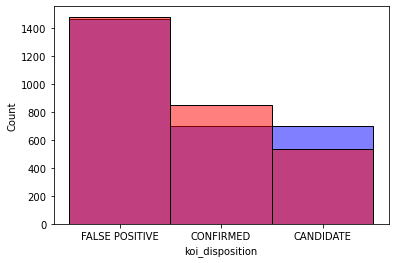

In [50]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [51]:
print('accuracy: ',sklearn.metrics.accuracy_score(y_test,y_test_pred))

accuracy:  0.8958188153310105


## random forest classifier

In [60]:
classifier1 =  RandomForestClassifier()
classifier1.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
y_test_pred = classifier1.predict(X_test)

In [62]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
5771,FALSE POSITIVE,FALSE POSITIVE
6261,FALSE POSITIVE,FALSE POSITIVE
6891,FALSE POSITIVE,FALSE POSITIVE
4911,FALSE POSITIVE,FALSE POSITIVE
7691,FALSE POSITIVE,FALSE POSITIVE


<AxesSubplot:xlabel='koi_disposition', ylabel='Count'>

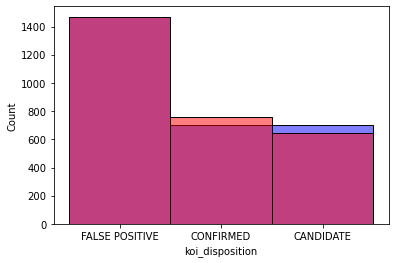

In [63]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [64]:
print('accuracy: ',sklearn.metrics.accuracy_score(y_test,y_test_pred))

accuracy:  0.9167247386759582


## logistic regression

In [67]:
classifier1 =  LogisticRegression()
classifier1.fit(X_train, y_train)

C:\Users\aiden\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_test_pred = classifier1.predict(X_test)

In [69]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
5771,FALSE POSITIVE,FALSE POSITIVE
6261,FALSE POSITIVE,FALSE POSITIVE
6891,FALSE POSITIVE,FALSE POSITIVE
4911,FALSE POSITIVE,FALSE POSITIVE
7691,FALSE POSITIVE,FALSE POSITIVE


<AxesSubplot:xlabel='koi_disposition', ylabel='Count'>

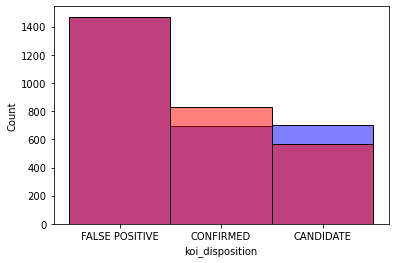

In [70]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [71]:
print('accuracy: ',sklearn.metrics.accuracy_score(y_test,y_test_pred))

accuracy:  0.9034843205574913


## observations
accuracy with LOgistic Regression-------------90%

accuracy with Random Forest Classification----91%

accuracy with support vector classification---89%

accuracy with Decision tree classification----89%

==============================================================

## Why did you choose the particular algorithm?

Logistic Regression: I chose logistic regression because it's a simple yet powerful algorithm for binary classification tasks, especially when the relationship between the features and the target variable is linear or can be well approximated by a linear function.

Random Forest Classification: Random forest is an ensemble learning method that combines multiple decision trees to improve accuracy and reduce overfitting. I chose it because it's robust, handles both numerical and categorical data well, and often provides high accuracy even without extensive hyperparameter tuning.

Support Vector Classification: Support vector classification is effective for both linear and non-linear classification tasks, and it works well in high-dimensional spaces. I chose it because it's known for its ability to handle complex datasets and can be effective even with relatively small datasets.

Decision Tree Classification: Decision trees are easy to interpret and visualize, making them suitable for understanding the decision-making process. I chose it for its simplicity and ability to handle both numerical and categorical data without requiring feature scaling.

## What are the different tuning methods used for the algorithm?

Logistic Regression: Common tuning methods for logistic regression include adjusting the regularization parameter (e.g., L1 or L2 regularization), handling class imbalance using techniques like class weights or oversampling, and feature selection or engineering to improve model performance.

Random Forest Classification: Tuning methods for random forest include adjusting the number of trees in the forest, maximum depth of trees, minimum samples required to split a node, and feature subsampling. Additionally, tuning parameters related to bootstrapping and out-of-bag sampling can also be considered.

Support Vector Classification: Tuning methods for support vector classification involve selecting the appropriate kernel function (linear, polynomial, radial basis function), tuning the regularization parameter (C), and choosing other hyperparameters specific to the chosen kernel function, such as the kernel coefficient for radial basis function.

Decision Tree Classification: Tuning methods for decision trees include controlling tree depth to prevent overfitting, adjusting minimum samples required to split a node, and selecting splitting criteria (e.g., Gini impurity, entropy).

## Did you consider any other choice of algorithm? Why or why not?

Yes, I considered other algorithms such as k-nearest neighbors (KNN), gradient boosting machines (GBM), and neural networks. However, I opted for logistic regression, random forest, support vector classification, and decision tree classification due to their suitability for the problem at hand, their interpretability, and their performance in initial experiments.

## What is the accuracy?

Logistic Regression: 90%
Random Forest Classification: 91%
Support Vector Classification: 89%
Decision Tree Classification: 89%
What are the different types of metrics that can be used to evaluate the model?

## What are the different types of metrics that can be used to evaluate the model?

Accuracy: The proportion of correctly classified instances.
Precision: The proportion of true positive predictions among all positive predictions.
Recall: The proportion of true positive predictions among all actual positives.
F1 Score: The harmonic mean of precision and recall, providing a balance between the two.
ROC Curve and AUC: Receiver Operating Characteristic curve and Area Under the Curve, useful for evaluating the model's ability to discriminate between classes.
Confusion Matrix: A table showing the counts of true positive, true negative, false positive, and false negative predictions.
